# Clustering tutorial 

This tutorial demonstrates the experimental clustering API for capymoa. 
Clustering data streams refers to grouping data points into clusters as the data continuously flows in, which normally includes two phases: 


1. **Online Step** 
    1. **Micro-Cluster Formation**: Incoming data points are incrementally processed and assigned to micro-clusters. Micro-clusters are small, temporary clusters that capture local density information and are typically represented by statistical summaries like centroid, weight, and radius.

    2. **Micro-Cluster Maintenance**: The micro-clusters are periodically updated as new data arrives. This includes adjusting the micro-cluster centroids and merging or splitting clusters based on defined thresholds.

2. **Offline Step**: Periodically or upon request, micro-clusters are aggregated into macro-clusters (or simply clusters) to provide a higher-level view of the data.

<span style="color:red">This is an experimental API might change significantly in the near future. </span>

---

*More information about CapyMOA can be found in* https://www.capymoa.org

**last update on 31/07/2024**

## 1. Creating and using a clusterer

- Example using `CluStream` and `kMeans` for the offline step
- There is not evaluation included in the example below, just updating and plotting the cluster
- The data is generated using `RandomRBFGeneratorDrift` 
- We use a visualization function to print the clustering state

Processed 100 instances.


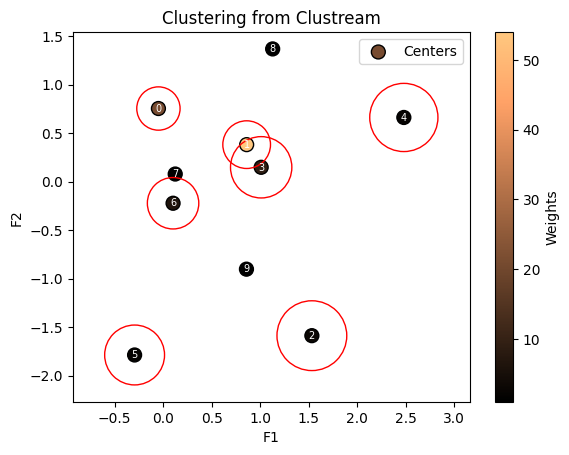

Processed 200 instances.


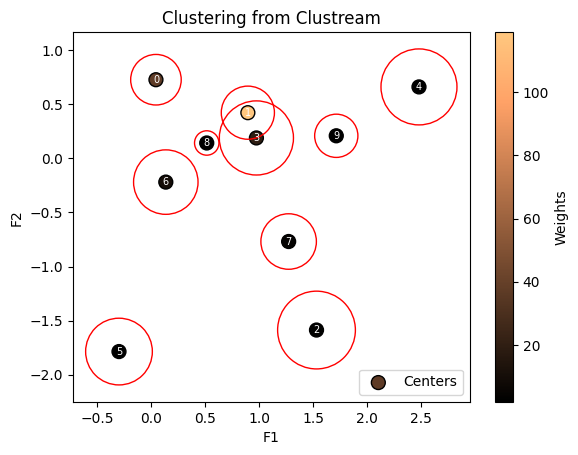

Processed 300 instances.


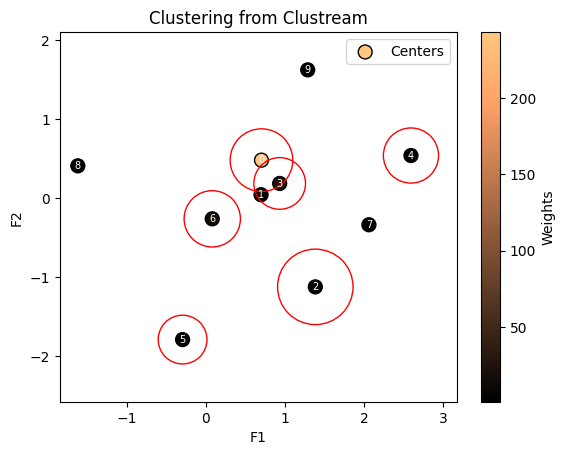

In [8]:
from capymoa.base import MOAClusterer
from capymoa.stream.generator import RandomRBFGeneratorDrift
from moa.clusterers.clustream import Clustream, WithKmeans
from capymoa.evaluation.visualization import plot_clustering_state

stream = RandomRBFGeneratorDrift(number_of_attributes=2, number_of_centroids=10, number_of_drifting_centroids=1, magnitude_of_change=0.001)
clustream = MOAClusterer(schema=stream.get_schema(), moa_learner=Clustream, CLI="-k 10")

instancesSeen = 0
updateInterval = 100
while stream.has_more_instances() and instancesSeen < 300:
    instance = stream.next_instance()
    clustream.train(instance)
    instancesSeen += 1
    if instancesSeen % updateInterval == 0:
        print(f"Processed {instancesSeen} instances.")
        plot_clustering_state(clustream)
        # by default, plot_clustering_state only shows the image and does not save it

In [2]:
# display(clustream.get_clusters_centers())
# display(clustream.get_clusters_radii())
# display(clustream.get_clusters_weights())
display(clustream.get_micro_clusters_centers())
display(clustream.get_micro_clusters_radii())
display(clustream.get_micro_clusters_weights())

[[0.7027297664446033, 0.48436259505735557],
 [0.6974195023636138, 0.047132011643317165],
 [1.3843306797089867, -1.1195974718089243],
 [0.9332892269417015, 0.18965577888570828],
 [2.594958431363642, 0.542854884614332],
 [-0.2954762950409765, -1.7866300787093923],
 [0.08002810100754684, -0.2581958903238688],
 [2.0626324089260955, -0.3333113490459889],
 [-1.621637947418178, 0.4123311823612874],
 [1.288276092609038, 1.6268924464685357]]

[0.3965114566526662,
 0.0,
 0.47769918990450105,
 0.326980164013242,
 0.34897939568703773,
 0.30856546943859814,
 0.3562454982611787,
 0.0,
 0.0,
 0.0]

[243.0, 1.0, 7.0, 25.0, 3.0, 2.0, 16.0, 1.0, 1.0, 1.0]

## 2. Using the Clustering Evaluator


In [3]:
from capymoa.evaluation import ClusteringEvaluator

In [4]:
stream = RandomRBFGeneratorDrift(number_of_attributes=2, number_of_centroids=10, number_of_drifting_centroids=1, magnitude_of_change=0.001)
clustream = MOAClusterer(schema=stream.get_schema(), moa_learner=Clustream, CLI="-k 10")
evaluator = ClusteringEvaluator(update_interval=50)

### 2.1 Plot the clustering state on demand

In [5]:
while stream.has_more_instances() and evaluator.get_instances_seen() < 1000:
    instance = stream.next_instance()
    clustream.train(instance)
    evaluator.update(clustream)
    instancesSeen = evaluator.get_instances_seen()
    # purposefully arbitrary number
    if instancesSeen == 157:
        # can also skip show and only save
        print(f"Processed {instancesSeen} instances. Saving the figure without showing it.")
        plot_clustering_state(clustream, show_fig=False, save_fig=True, figure_name='save_fig_dont_show')


Processed 157 instances. Saving the figure without showing it.


### 2.2 Plot the clustering evolution (gif)

- Passing `clean_up=False` to the `plot_clustering_evolution` function will keep the intermediate figures used to create the gif.


In [6]:
from capymoa.evaluation.visualization import plot_clustering_evolution
plot_clustering_evolution(evaluator, clean_up=True)